# *1. Requirements*

## *1.1 Import những module và thư viện cần thiết*

In [1]:
import re
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## *1.2. Read the dataset from file path*


In [2]:
df = pd.read_csv(r"D:\shopee_spam_detection\data\raw\labeled_data.csv")

# *2. EDA*

In [3]:
df[df['sentiment'].isna()]

,annotation_id,annotator,comment,created_at,id,lead_time,product_name,rating,sentiment,updated_at,username
86,109,1,Đẹp lắm luôn. Bỏ trong hộp nhìn xịn xò. Đóng g...,2024-04-14T12:20:23.125143Z,88,6.995,{Mẫu 2021} Ghim cài áo Vest Nam thời trang nhi...,5,NaN,2024-04-14T12:20:23.125143Z,kimtrucnguyen1704
404,677,1,Quá tuyệt vời 🤩 \r\nVì bé em nhận giúp nên khô...,2024-04-14T14:06:50.600967Z,406,1.457,{Mẫu 2021} Ghim cài áo Vest Nam thời trang nhi...,5,NaN,2024-04-14T14:06:50.600967Z,n*****8
442,416,1,đẹp,2024-04-14T13:52:33.047721Z,444,1.381,{Mẫu 2023} Ghim cài áo Vest Nam thời trang nhi...,5,NaN,2024-04-14T13:53:44.077893Z,lucky1807
444,711,1,"Đẹp lắm nha mọi người, nên mua nhá",2024-04-14T14:07:52.567583Z,446,0.886,{Mẫu 2022} Ghim cài áo Vest Nam thời trang nhi...,5,NaN,2024-04-14T14:07:52.567583Z,maihuynhnhu1681998
470,20,1,Đẹp,2024-04-13T17:22:23.494395Z,472,1.540,{Mẫu 2022} Ghim cài áo Vest Nam thời trang nhi...,5,NaN,2024-04-13T17:22:23.494395Z,phuongmomiji
473,417,1,đẹp,2024-04-14T13:52:34.396515Z,475,1.181,{Mẫu 2022} Ghim cài áo Vest Nam thời trang nhi...,5,NaN,2024-04-14T13:53:42.552545Z,leelee511
483,744,1,Chất liệu:vải\r\nMàu sắc:đen\r\n\r\nĐúng với m...,2024-04-14T14:08:44.981898Z,485,1.096,Găng Tay Chạy Bộ Đạp Xe Mùa Đông Chống Nước Có...,5,NaN,2024-04-14T14:08:44.981898Z,quanganh011
582,4823,1,Giao đúng hàng 💪🏼 tuy hơi lâu nhưng oke,2024-04-15T08:18:02.220711Z,584,1.807,"(Tặng Sao) Mũ cối cốt phíp SIÊU BỀN, mũ cối xa...",5,NaN,2024-04-15T08:18:02.220711Z,wazza1907
629,1188,1,Đúng với mô tả:hàng giống hình\r\nMàu sắc:trắn...,2024-04-14T15:47:03.053362Z,631,2.159,Đôi găng tay trắng dùng trong dịp trang trọng ...,5,NaN,2024-04-14T15:47:03.053362Z,hoanganhh2k4
784,3924,1,Ng bán ko có tâm và rất ẩu trọng việc đóng gói...,2024-04-15T04:15:01.141246Z,786,1.996,[❤️ ĐƯỢC CHỌN KHUÔN VÀ MÀU MỰC ❤️] Hình xăm Tạ...,3,NaN,2024-04-15T04:15:01.141246Z,hoangthienan.00


## *2.1. Phân phối của biến mục tiêu*

C:\Users\Admin\AppData\Local\Temp\ipykernel_28984\1608894623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette=color_palette)


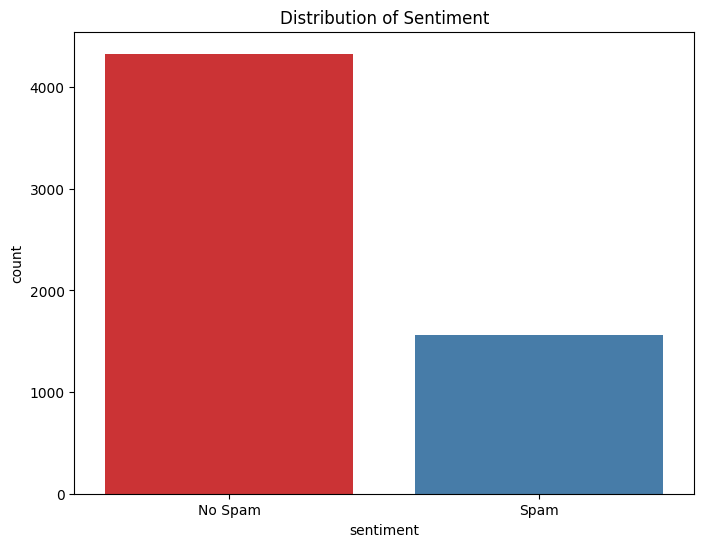

In [4]:
color_palette = "Set1"
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette=color_palette)
plt.title('Distribution of Sentiment')
plt.show()

## *2.2. Những từ, cụm từ phổ biến nhất trong bộ dữ liệu*

In [5]:
from wordcloud import WordCloud

# Combine all comments into one thread
all_comments = ' '.join(df['comment'].astype(str))

# Ceate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Show WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

## *2.3. Độ dài các bình luận trong bộ dữ liệu*

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


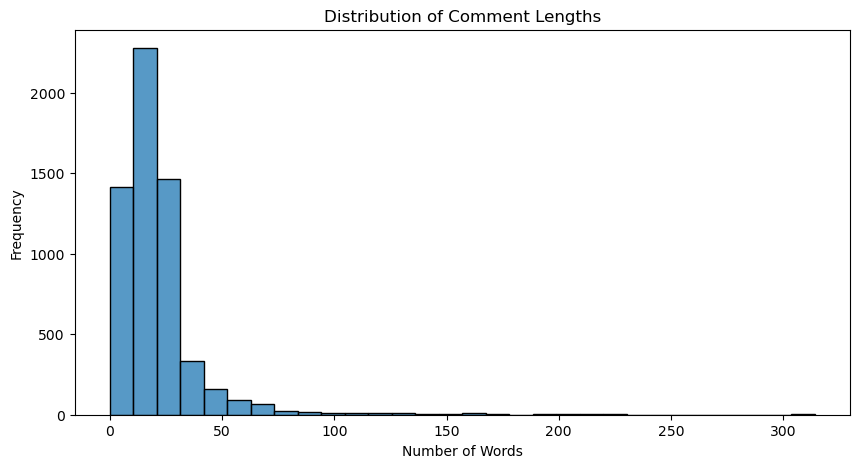

In [ ]:
# Calculate the length of each comment
df['comment_length'] = df['comment'].apply(lambda x: len(x.split()))

# Plot the distribution of comment lengths
plt.figure(figsize=(10, 5))
sns.histplot(df['comment_length'], bins=30)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

## *2.4. Những từ, cụm từ phổ biến nhất trong bộ dữ liệu nhưng không phải stopword*

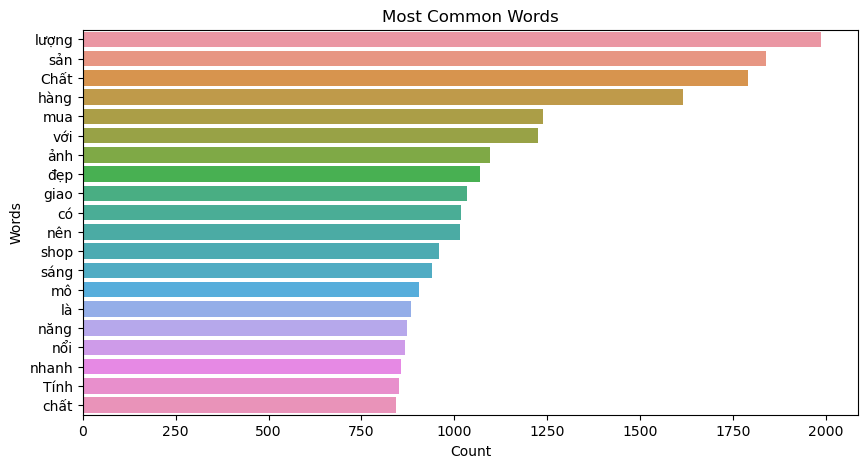

In [ ]:
# Ghép tất cả các bình luận thành một chuỗi
all_comments = ' '.join(df['comment'].astype(str))

# Tách từ và đếm tần suất xuất hiện
words = all_comments.split()
word_counts = Counter(words)

# Lấy 20 từ phổ biến nhất
common_words = word_counts.most_common(20)

# Chuyển kết quả thành DataFrame
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='word', data=common_words_df)
plt.title('Most Common Words')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()

## *2.5. Độ dài của các bình luận Spam/ No Spam*

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


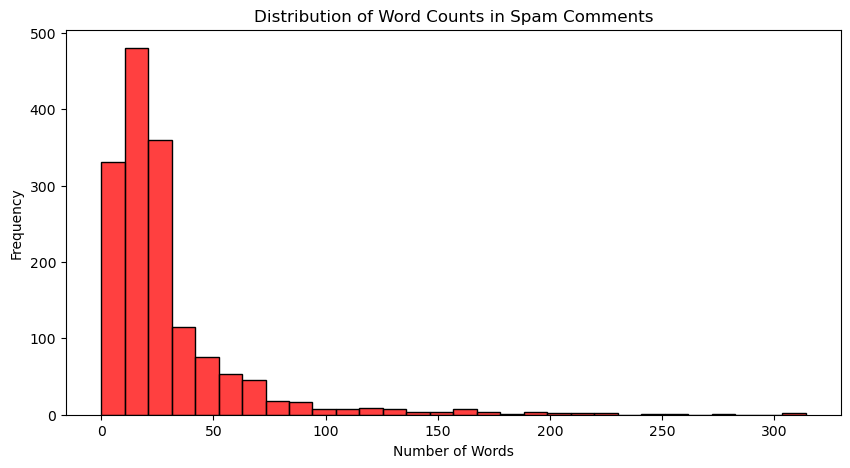

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


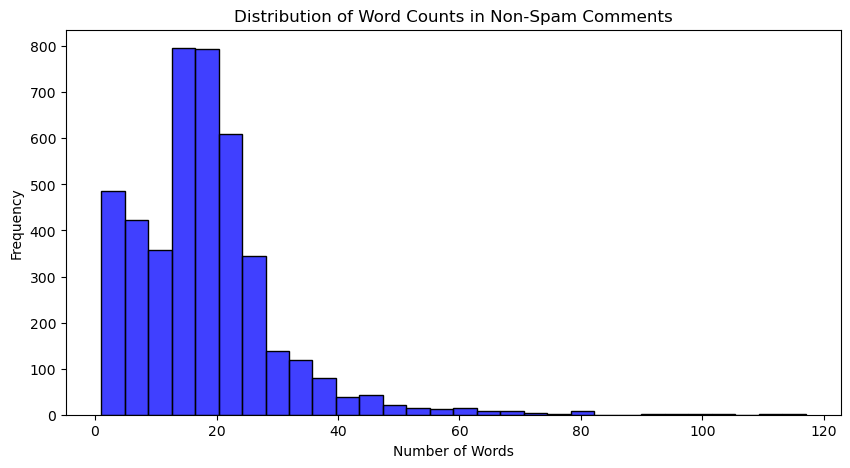

In [ ]:
df['word_count'] = df['comment'].apply(lambda x: len(x.split()))
df_spam = df[df['sentiment'] == 'Spam']
df_non_spam = df[df['sentiment'] == 'No Spam']
plt.figure(figsize=(10, 5))
sns.histplot(df_spam['word_count'], bins=30, color='red')
plt.title('Distribution of Word Counts in Spam Comments')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(10, 5))
sns.histplot(df_non_spam['word_count'], bins=30, color='blue')
plt.title('Distribution of Word Counts in Non-Spam Comments')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

## *2.6. Những từ phổ biến nhất trong các bình luận Spam/No Spam*

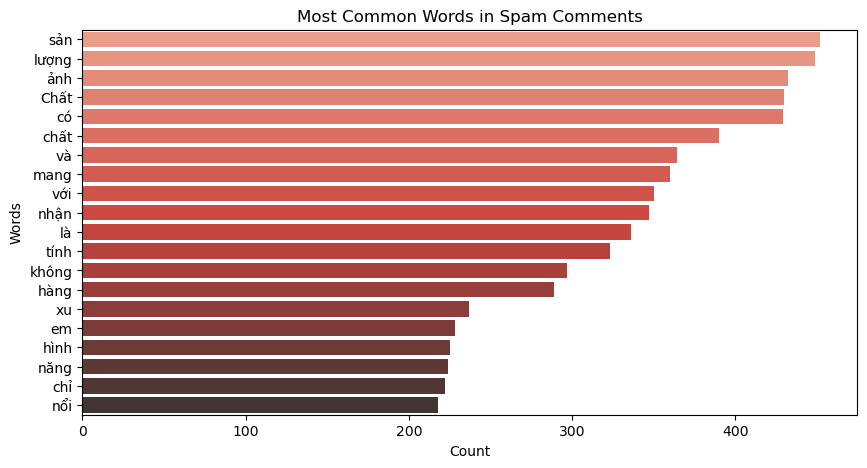

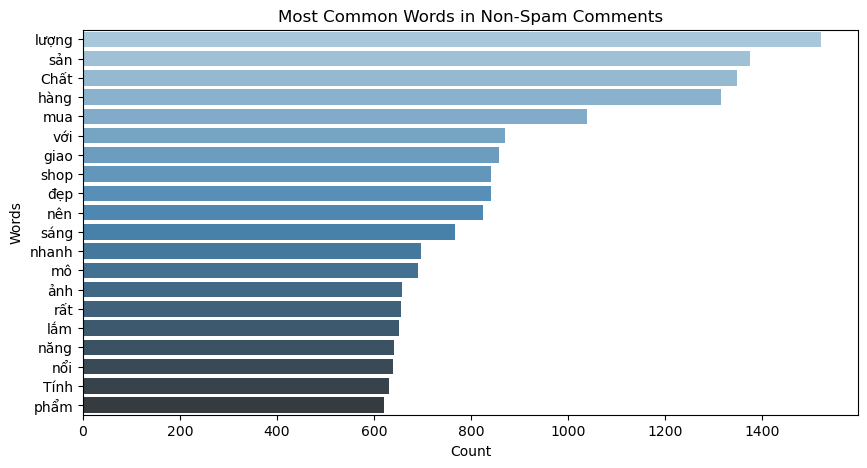

In [ ]:
from collections import Counter
def get_common_words(comments, top_n=20):
    words = ' '.join(comments).split()
    word_counts = Counter(words)
    return word_counts.most_common(top_n)

# Đếm từ phổ biến trong spam và non-spam
common_words_spam = get_common_words(df_spam['comment'])
common_words_non_spam = get_common_words(df_non_spam['comment'])

# Chuyển kết quả thành DataFrame
common_words_spam_df = pd.DataFrame(common_words_spam, columns=['word', 'count'])
common_words_non_spam_df = pd.DataFrame(common_words_non_spam, columns=['word', 'count'])

# Vẽ biểu đồ cho spam
plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='word', data=common_words_spam_df, palette='Reds_d')
plt.title('Most Common Words in Spam Comments')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()

# Vẽ biểu đồ cho non-spam
plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='word', data=common_words_non_spam_df, palette='Blues_d')
plt.title('Most Common Words in Non-Spam Comments')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()